# House Price Prediction

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from model_utils import report, cv_scores

from sklearn.neighbors import KNeighborsRegressor

## Data Preprecessing

### Importing the dataset

In [2]:
X = pd.read_csv('X.csv')
y = pd.read_csv('y.csv')

### Splitting the dataset into the Training set and Test set 

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [4]:
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.transform(X_test)

y_train_sc = sc_y.fit_transform(y_train)
y_test_sc = sc_y.transform(y_test)

## Training the KNN model

### Grid Search

In [5]:
param = [{'n_neighbors': np.arange(2, 11),
          'weights': ['uniform', 'distance'],
          'p': [1, 2],
          'metric': ['euclidean', 'manhattan', 'minkowski'],
          'algorithm': ['auto', 'ball_tree', 'kd_tree']}]

gs = GridSearchCV(KNeighborsRegressor(), param_grid=param, scoring='r2', cv = 10)
gs.fit(X_train_sc, y_train_sc.ravel())

model = gs.best_estimator_
print(gs.best_params_)

{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 2, 'p': 1, 'weights': 'distance'}


### Cross Validation (R-Squared)

,Scores
Split 1,0.92872
Split 2,0.90458
Split 3,0.85733
Split 4,0.89543
Split 5,0.82855
Split 6,0.89616
Split 7,0.86924
Split 8,0.92260
Split 9,0.89145
Split 10,0.91793


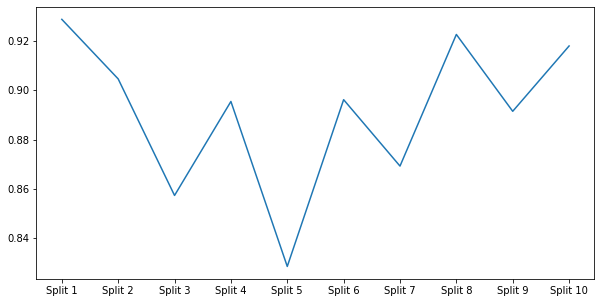

In [6]:
cv_scores(model, X_train_sc, y_train_sc)

### Testing data

,Value
Metric,
R2 Score,0.921054
MAE,47992.505187
RMSE,58819.751581


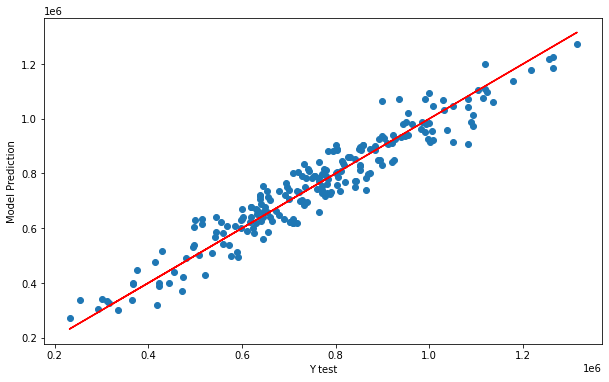

In [7]:
y_pred = model.predict(X_test_sc)

report(y_test, sc_y.inverse_transform(y_pred))